# Latar Belakang
Dalam industri ritel modern, khususnya pada sektor supermarket, **memahami perilaku konsumen** menjadi salah satu kunci utama untuk meningkatkan penjualan dan membangun loyalitas pelanggan. Konsumen datang dari berbagai latar belakang seperti **usia, status pernikahan, tingkat pendidikan, dan tingkat pendapatan**. Variasi ini dapat sangat memengaruhi **produk apa yang mereka beli, berapa banyak yang mereka beli, serta melalui kanal mana mereka lebih suka berbelanja** (store, web, atau katalog).

Melalui pemahaman yang lebih dalam terhadap perilaku dan preferensi pelanggan ini, diharapkan perusahaan dapat **menyusun strategi pemasaran yang lebih tepat sasaran**, **meningkatkan kepuasan pelanggan**, serta **mendorong pertumbuhan bisnis** yang lebih berkelanjutan.


# Pernyataan Masalah
Berdasarkan latar belakang di atas, maka rumusan masalah dalam analisis ini antara lain:
1. Dimanakah Customer lebih sering melakukan transaksi? (Store, Web, dan Catalogue)
2. Kategori produk apa yang penjualannya paling tinggi?
3. Apakah tingkat complain tinggi?
4. Apakah kampanye yang dilakukan diterima oleh pelanggan?
5. Apakah diskon mempengaruhi banyaknya pembelian oleh pelanggan?
6. Apakah tahun lahir, status, pendidikan, dan pendapatan customer mempengaruhi banyaknya produk yang dibeli?
7. Apakah tahun lahir, status, pendidikan, dan pendapatan customer mempengaruhi kategori produk yang dibeli?

# Audience
- Manager Toko
- Tim Marketing


# Data Set

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load Dataset
df = pd.read_csv('Supermarket Customers.csv', sep = '\t')

In [ ]:
# Menampilkan 5 kolom teratas dan 5 kolom terbawah dari dataset
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


# Data Understanding
Tahap ini agar kita mengetahui dataset kita lebih jauh dalam tahapan. Lewat proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [13]:
# Menampilkan informasi tiap kolom
info_kolom = []

for kolom in df.columns:
    nama_kolom = kolom
    tipe_data = df[kolom].dtype
    jumlah_null = df[kolom].isna().sum()
    persen_null = round((jumlah_null / len(df)) * 100, 2)
    jumlah_unique = df[kolom].nunique()
    contoh_unique = df[kolom].sample(3, random_state=1).values 

    info_kolom.append([nama_kolom, tipe_data, jumlah_null, persen_null, jumlah_unique, contoh_unique])

df_info = pd.DataFrame(info_kolom, columns=['Nama Kolom', 'Tipe Data', 'Jumlah Null', 'Persentase Null (%)', 'Jumlah Unique', 'Contoh Unique'])
df_info


,Nama Kolom,Tipe Data,Jumlah Null,Persentase Null (%),Jumlah Unique,Contoh Unique
0,ID,int64,0,0.00,2240,"[10736, 9799, 9925]"
1,Year_Birth,int64,0,0.00,59,"[1971, 1968, 1981]"
2,Education,object,0,0.00,5,"[Graduation, PhD, PhD]"
3,Marital_Status,object,0,0.00,8,"[Single, Divorced, Together]"
4,Income,float64,24,1.07,1974,"[72258.0, 83664.0, 39665.0]"
5,Kidhome,int64,0,0.00,3,"[0, 1, 1]"
6,Teenhome,int64,0,0.00,3,"[1, 1, 0]"
7,Dt_Customer,object,0,0.00,663,"[12-09-2013, 08-05-2013, 25-05-2013]"
8,Recency,int64,0,0.00,100,"[28, 57, 97]"
9,MntWines,int64,0,0.00,776,"[522, 866, 127]"


**Secara umum, kita bisa melihat bahwa:**
* Dataset Supermarket Customer memiliki 28 kolom dan 19.158 baris
* Kolom *Income* memiliki 24 nilai NULL (missing value kolom Income sebanyak 24)
* Kolom Dt_Customer masih berbentuk Object

# Data Cleaning & Finding Anomalies

Pada tahap ini akan dilakukan pengecekan data dan data cleaning yang terbagi ke dalam:
1. Cek Data Duplicates
2. Cek Outliers
3. Cek Missing Value
4. Data Formatting

**1. Cek Data Duplicate**

In [ ]:
# Menampilkan baris duplikat dari semua kolom
duplicates_all = df[df.duplicated()]
print(f'Jumlah Data Duplikat adalah {duplicates_all.shape[0]}')

Total Jumlah Duplikat adalah 0


In [22]:
# Menampilkan baris duplikat berdasarkan kolom 'ID'
duplicates_id = df[df['ID'].duplicated()]
print(f'Jumlah ID Duplikat adalah {duplicates_id.shape[0]}')

Jumlah ID Duplikat adalah 0


**Kesimpulan sementara:**
- Data secara keseluruhan tidak ada duplicate
- Bedasarkan cek duplikasi kolom ID, tidak terdapat data dengan ID yang sama (tidak ada duplikasi)

In [28]:
# Mengecek duplikasi tanpa kolom ID
all= df.columns.tolist()

subset_columns = all_columns.copy() 
subset_columns.remove('ID')

#Cari baris duplikat berdasarkan kolom selain 'ID'
duplicate_rows = df[df.duplicated(subset=subset_columns, keep=False)]


duplicate_rows_sorted = duplicate_rows.sort_values(by='Income')
print(f'Jumlah baris duplikat: {duplicate_rows_sorted.shape[0]}')
print(duplicate_rows_sorted)


Jumlah baris duplikat: 358
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
30     6864        1989      Master       Divorced  10979.0        0   
1138  10617        1989      Master       Divorced  10979.0        0   
1203    234        1979  Graduation       Divorced  15287.0        1   
260   10264        1979  Graduation       Divorced  15287.0        1   
558    8420        1970    2n Cycle        Married  15315.0        0   
...     ...         ...         ...            ...      ...      ...   
824    5536        1959  Graduation       Together  87771.0        0   
1301   6024        1953  Graduation       Together  94384.0        0   
943    5386        1953  Graduation       Together  94384.0        0   
650    4248        1960      Master         Single  98777.0        0   
1113   7451        1960      Master         Single  98777.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
30           0  22-05-2014       34

**Kesimpulan sementara:**
- Ketika mengecek duplikasi tanpa kolom ID, didapatkan duplikasi 358 baris. Berikutnya, data ini akan dihapus, untuk menghindari analisis dengan isi data yang sama. Namun, data pertama akan disimpan.

In [29]:
# Menghapus data duplikat
df.drop_duplicates(subset=subset_columns, keep='first', inplace=True)

**Short Explanation**
- Berdasarkan rumusan masalah nomor 3 di mana kita mau melihat efektif tidaknya campaign dengan melihat kolom response, maka kita akan mengecek apakah ada duplikasi pada kolom response

In [34]:
# Menghapus kolom 'Response' dari daftar kolom yang akan diperiksa duplikat
if 'Response' in subset_columns:
    subset_columns.remove('Response')

# Mencari baris yang duplikat berdasarkan kolom selain 'Response' dan 'ID'
duplicate_rows2 = df[df.duplicated(subset=subset_columns, keep=False)]
duplicate_rows2_sorted = duplicate_rows2.sort_values(by='Income')

# view
print(f'Jumlah baris duplikat: {duplicate_rows2_sorted.shape[0]}')
print(duplicate_rows2_sorted)


Jumlah baris duplikat: 38
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
548    9671        1968  Graduation        Married  19514.0        1   
1008   8975        1968  Graduation        Married  19514.0        1   
8      4855        1974         PhD       Together  30351.0        1   
408    5049        1974         PhD       Together  30351.0        1   
1614   6215        1977  Graduation        Married  31353.0        1   
195    7224        1977  Graduation        Married  31353.0        1   
1426   8254        1974         PhD        Married  34596.0        1   
968    2620        1974         PhD        Married  34596.0        1   
1715  10340        1984  Graduation       Together  35196.0        1   
1048   8870        1984  Graduation       Together  35196.0        1   
1585   1626        1973         PhD       Divorced  35860.0        1   
1063   2055        1973         PhD       Divorced  35860.0        1   
1093   9080        1972         PhD   

**Kesimpulan sementara:**
- Ketika mengecek duplikasi tanpa kolom ID dan Response, didapatkan duplikasi 38 baris. Berikutnya, data ini akan dihapus, untuk menghindari analisis dengan isi data yang sama. Namun, data pertama akan disimpan. (Perlakuan sama seperti sebelumnya)

In [35]:
# Delete Duplicate Value
df.drop_duplicates(subset=subset_columns, keep='first', inplace=True)

**2. Cek Data Outlier**

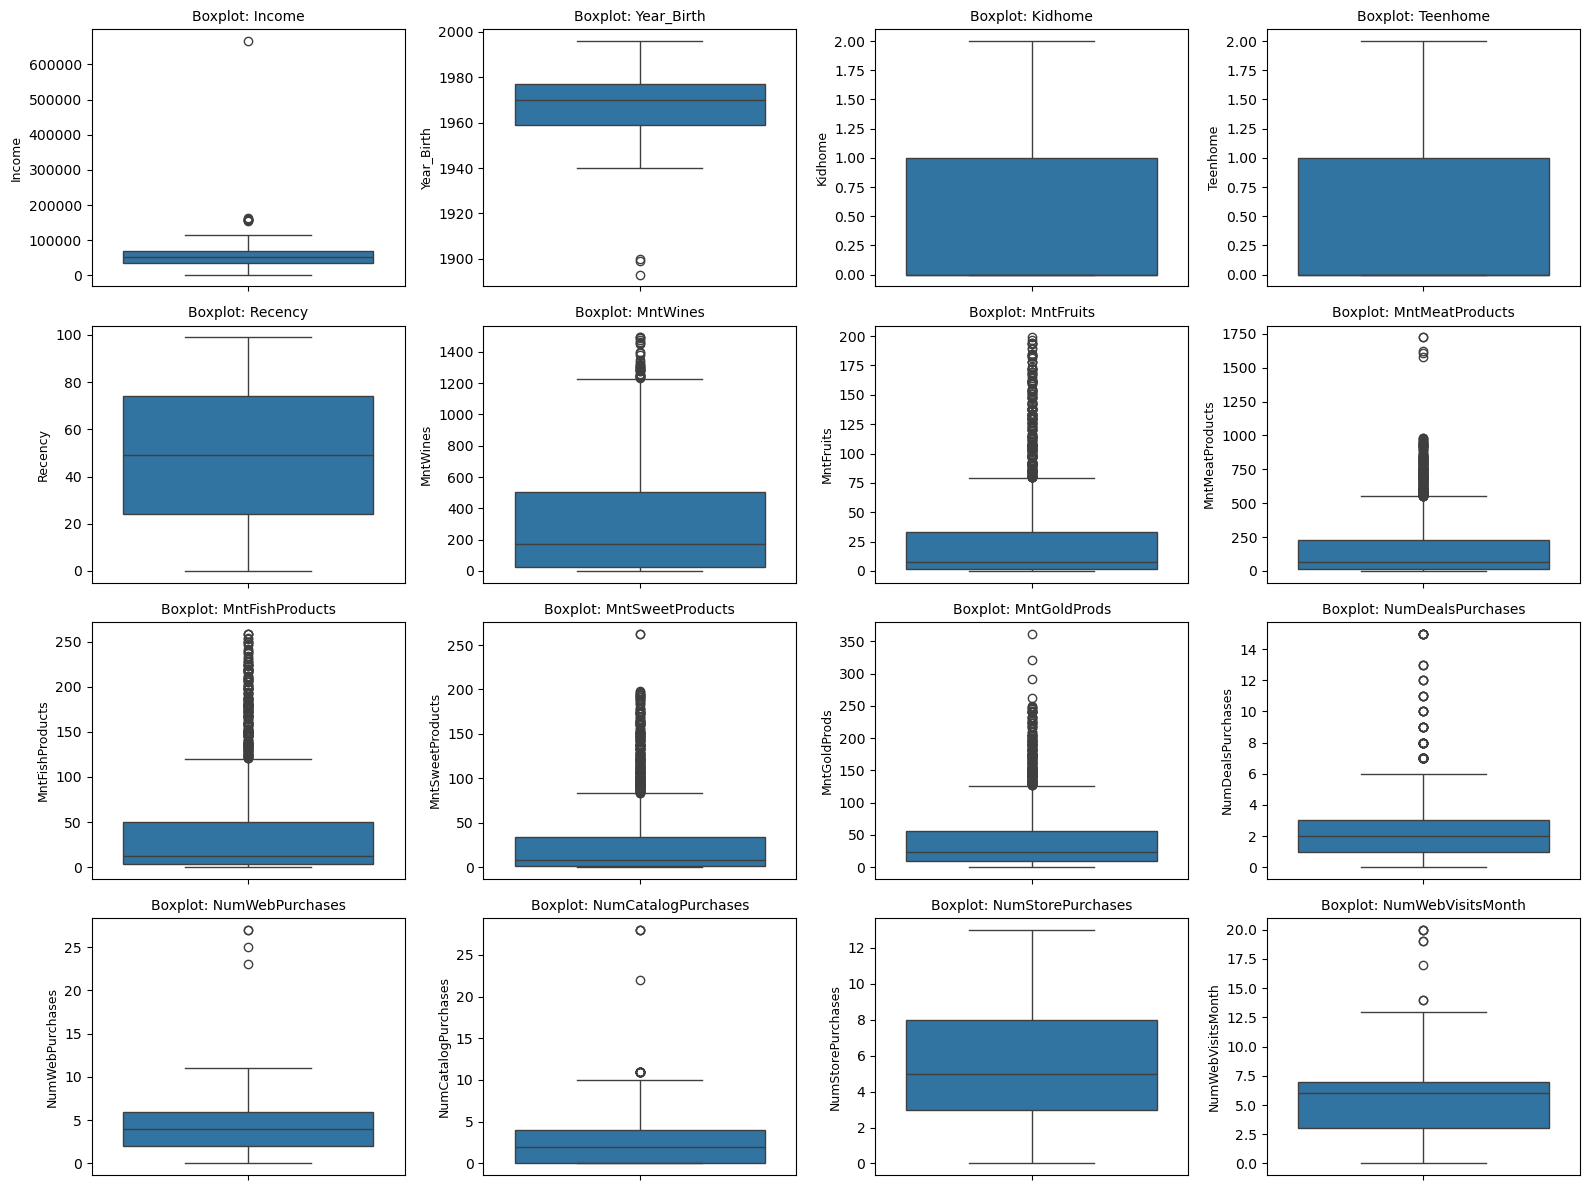

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom yang ingin dianalisis (kolom numerik saja)
plot_num = ['Income', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
            'NumWebVisitsMonth']


fig, axes = plt.subplots(4, 4, figsize=(16, 12)) 
axes = axes.flatten() 

# membuat boxplot
for i, column in enumerate(plot_num):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot: {column}', fontsize=10)
    axes[i].set_ylabel(column, fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Filter data untuk yang Income > 600000 dan Year_Birth < 1920
data1 = df[(df['Income'] > 200000)]
data2 = df[(df['Year_Birth'] < 1920)]

# Menampilkan jumlah data yang memenuhi kedua kondisi tersebut
print(f"Jumlah data outliers yang memiliki Income > 200.000: {data1.shape[0]}, dan Year_Birth < 1920: {data2.shape[0]}")

# indeks data yang memenuhi kondisi Income > 200000
print(f"Indeks data dengan Income > 200.000:\n{data1.index.tolist()}")

# indeks data yang memenuhi kondisi Year_Birth < 1920
print(f"Indeks data dengan Year_Birth < 1920:\n{data2.index.tolist()}")

Jumlah data outliers yang memiliki Income > 200.000: 1, dan Year_Birth < 1920: 3
Indeks data dengan Income > 200.000:
[2233]
Indeks data dengan Year_Birth < 1920:
[192, 239, 339]


**Kesimpulan Sementara:**
1. Bedasarkan boxplot di atas, HANYA kolom NumStorePurchases dan Recency yang terdistribusi normal
2. Pada kolom Income, terdapat 1 Customer yang memiliki Income yang sangat jauh dari rata-rata yaitu sekitar 600.000 dan dianggap sebagai Outliers
3. Pada kolo Year_Birth terdapat 3 Customer yang lahir dibawah tahun 1920, dan dianggap sebagai Outliers

In [47]:
# Menghapus data yang memenuhi kondisi outliers (Income > 200000 dan Year_Birth < 1920)
df_cleaned1 = df[df['Income'] <= 200000]  # Menghapus data dengan Income > 200000
df_cleaned2 = df[df['Year_Birth'] >= 1920]  # Menghapus data dengan Year_Birth < 1920

# Gabungkan kedua kondisi untuk menghapus data yang memenuhi salah satu atau keduanya
df_cleaned = df_cleaned1[df_cleaned1['Year_Birth'] >= 1920]

# Menampilkan jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus outliers (Income > 200000): {df_cleaned1.shape[0]}")
print(f"Jumlah data setelah menghapus outliers (Year_Birth < 1920): {df_cleaned2.shape[0]}")
print(f"Jumlah data setelah menghapus outliers berdasarkan kedua kondisi: {df_cleaned.shape[0]}")


Jumlah data setelah menghapus outliers (Income > 200000): 2014
Jumlah data setelah menghapus outliers (Year_Birth < 1920): 2036
Jumlah data setelah menghapus outliers berdasarkan kedua kondisi: 2011


**3. Cek Missing Value**
- Berdasarkan tahap Data Understanding, HANYA Kolom Income yang memiliki missing value sebanyak 24

In [49]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


Berdasarkan boxplot pada bagian Outliers, tampak bahwa kolom Income memiliki distribusi right skewed.

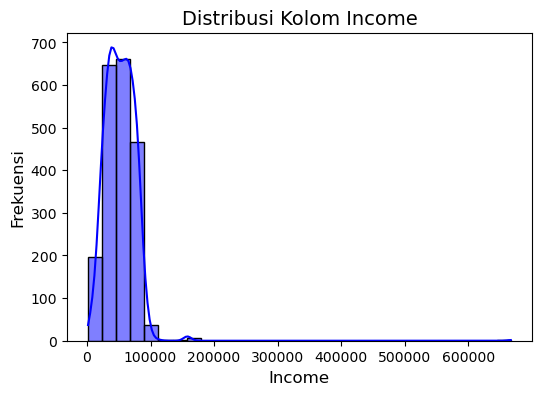

In [51]:
# visualisasi kembali histogram distribusi kolom income
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(df['Income'], kde=True, color='blue', bins=30)
plt.title('Distribusi Kolom Income', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()


**Short Explanation:**
- Untuk menentukan berapa value yang tepat untuk mengisi missing value dari kolom Income, kita bisa membandingkannya dengan kolom Education karena ada kemungkinan (asumsi) bahwa pendidikan seseorang berhubungan dengan tingkat pendapatan mereka.

In [53]:
# menentukan median kolom income
median_income = df.groupby('Education')['Income'].median()
print(median_income)

Education
2n Cycle      46772.0
Basic         20194.0
Graduation    52372.5
Master        51044.5
PhD           55260.0
Name: Income, dtype: float64


In [55]:
# mengisi missing value berdasarkan nilai median kolom education
def fill_missing_income(row):
    if pd.isna(row['Income']):  
        return median_income[row['Education']]  
    return row['Income']
df['Income'] = df.apply(fill_missing_income, axis=1)
# print(df)


In [69]:
df['Income'].isna().sum()

0

**4. Data Formatting**
* Bagian ini kita akan mengubah format dari beberapa, yaitu:
    - Kolom Df_Customer dari Object ke DateTime
    - Klasifikasi ulang/Mengubah value kolom Marital Status
    - Klasifikasi ulang/Mengubah value kolom Education
    - Klasifikasi/Segmentation Generasi berdasarkan Year_Birth
    - Menambah Kolom Total_Buy, Freq_Place, dan Cat_Income

In [57]:
# mengubah df_customer jd datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [58]:
# Klasifikasi ulang/Mengubah value kolom Marital Status
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    517
Single      445
Divorced    213
Widow        70
Alone         3
Absurd        2
YOLO          1
Name: count, dtype: int64

Terlihat bahwa beberapa kelas sebenernya memiliki pengertian yang sama, maka akan diklasifikasikan ulang
- Single => Single, Alone, YOLO
- Together => Together, Absurd
- Married => Married
- Divorcede => Divorced, Widow

In [59]:

df['Marital_Status'].replace('Alone', 'Single', inplace=True)
df['Marital_Status'].replace('YOLO', 'Single', inplace=True)

df['Marital_Status'].replace('Absurd', 'Together', inplace=True)

df['Marital_Status'].replace('Widow', 'Divorced', inplace=True)
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    519
Single      449
Divorced    283
Name: count, dtype: int64

In [60]:
# Klasifikasi ulang/Mengubah value kolom Education
df['Education'].value_counts()

# Merubah nilai 2n Cycle menjadi Master
df['Education'].replace('2n Cycle', 'Master', inplace=True)
df['Education'].value_counts()

Education
Graduation    1025
Master         523
PhD            442
Basic           49
Name: count, dtype: int64

In [66]:
# Klasifikasi/Segmentation Kolom Year_Birth

print(f"Nilai minimum Tahun Lahir: {df['Year_Birth'].min()}")
print(f"Nilai maksimum Tahun Lahir: {df['Year_Birth'].max()}")


Nilai minimum Tahun Lahir: 1893
Nilai maksimum Tahun Lahir: 1996


**short explanation**
- Berdasarkan rentang min-max kolom Year_Birth, kita bisa melakukan segmentasi/klasifikasi dengan menambahkan kolom baru 'cust_generasi' dengan kategori:
1. Pre Boomer: Kelahiran sebelum tahun 1946
1. Baby Boomer: Kelahiran tahun 1946 - 1964.
2. Generasi X: Kelahirantahun 1965-1980.
3. Generasi Millennials: Kelahiran tahun 1981 - 1996.
4. Generasi Z: Kelahiran > 1996.

In [74]:
# Menambahkan kolom 'cust_generasi' berdasarkan tahun lahir
def cust_generasi(year_birth):
    if year_birth < 1946:
        return 'Pre Boomer'
    elif 1946 <= year_birth <= 1964:
        return 'Baby Boomer'
    elif 1965 <= year_birth <= 1980:
        return 'Generasi X'
    elif 1981 <= year_birth <= 1996:
        return 'Generasi Millennials'
    else:
        return 'Generasi Z'

df['cust_generasi'] = df['Year_Birth'].apply(cust_generasi)
print(df['cust_generasi'])


0                Baby Boomer
1                Baby Boomer
2                 Generasi X
3       Generasi Millennials
4       Generasi Millennials
                ...         
2233              Generasi X
2235              Generasi X
2237    Generasi Millennials
2238             Baby Boomer
2239             Baby Boomer
Name: cust_generasi, Length: 2039, dtype: object


In [76]:
df['cust_generasi'].value_counts()

cust_generasi
Generasi X              975
Baby Boomer             691
Generasi Millennials    347
Pre Boomer               26
Name: count, dtype: int64

In [ ]:
# Menambah Kolom Total_Buy dan Freq_Place
# Total_Buy => Kolom untuk menampilkan total pembelian (amount) per ID
df['Total_Buy'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                      df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Freq_Place => total frekuensi pembelian dari 3 tempat (Catalog, Store, Web)
df['Freq_Place'] = (df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases'])


In [87]:
# Menambah Kolom Cat_Income => klasifikasikan ulang kolom Income untuk mempermudah analisis
df['Income'].describe()

count      2039.000000
mean      52357.723884
std       25430.999524
min        1730.000000
25%       35702.500000
50%       51651.000000
75%       68298.500000
max      666666.000000
Name: Income, dtype: float64

In [92]:
def Cat_Income(income):
    if income <= 35702:
        return 'Low'
    elif income <= 51651:
        return 'Middle'
    elif income <= 68298:
        return 'High'
    else:
        return 'Very High'

df['Cat_Income'] = df['Income'].apply(Cat_Income)
df['Cat_Income'].value_counts()

Cat_Income
Middle       510
Very High    510
Low          510
High         509
Name: count, dtype: int64

# Data yang sudah bersih

In [164]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Generation,cust_generasi,Freq_Place,Total_Buy,Cat_Income
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,Baby Boomer,Baby Boomer,22,1617,High
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,Baby Boomer,Baby Boomer,4,27,Middle
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,Generasi X,Generasi X,20,776,Very High
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,Generasi Millennials,Generasi Millennials,6,53,Low
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,Generasi Millennials,Generasi Millennials,14,422,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,3,11,0,Generasi X,Generasi X,7,62,Very High
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,Generasi X,Generasi X,16,1341,High
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,Generasi Millennials,Generasi Millennials,18,1241,High
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,Baby Boomer,Baby Boomer,21,843,Very High


# Data Analysis

**GENERAL**
- Informasi/eksplorasi data yang ada (selain yang dirumuskan di rumusan masalah)

# Customer Trend

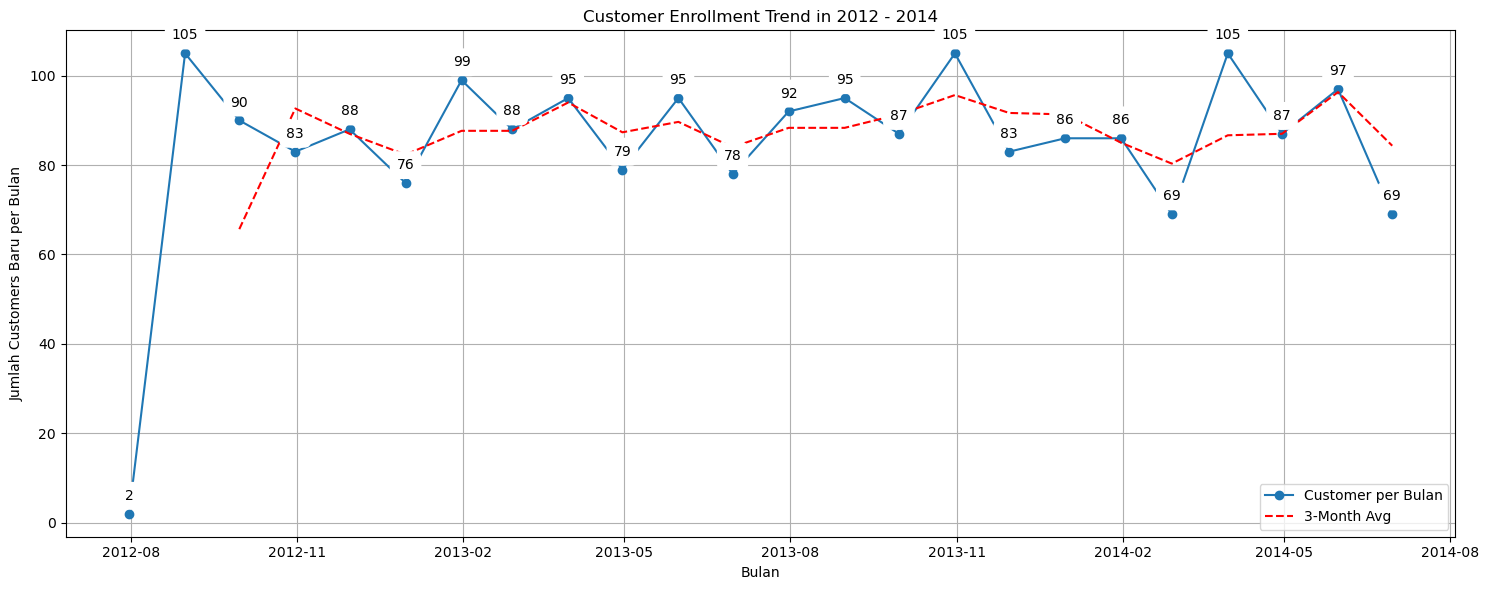

In [252]:
import matplotlib.dates as mdates

cust_bulanan = df.resample('M', on='Dt_Customer').size().loc['2012-01-01':'2014-12-31']

plt.figure(figsize=(15,6))
plt.plot(cust_bulanan.index, cust_bulanan.values, marker='o', linestyle='-', label='Customer per Bulan')

rolling = cust_bulanan.rolling(window=3).mean()
plt.plot(cust_bulanan.index, rolling, linestyle='--', color='red', label='3-Month Avg')

for i, value in enumerate(cust_bulanan.values):
    plt.annotate(str(value), 
                 (mdates.date2num(cust_bulanan.index[i]), value), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center',
                 bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))

plt.xlabel('Bulan')
plt.ylabel('Jumlah Customers Baru per Bulan')
plt.title('Customer Enrollment Trend in 2012 - 2014')
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Insights:**
1. **Tren stabil:** Secara umum, jumlah pelanggan baru per bulan relatif stabil dari 2012 hingga 2014, berkisar antara 75–100 pelanggan.
2. **Puncak rekrutmen:** Terdapat beberapa puncak signifikan, seperti **bulan Oktober 2012, Desember 2013, dan Maret 2014** — masing-masing mencapai **105 pelanggan baru**.
3. **Penurunan tajam:** Dua titik penurunan jelas terjadi pada **Awal 2012 dan Awal 2014**, di mana hanya **2–69 pelanggan baru** yang direkrut.
4. **Rata-rata bergulir (rolling mean)** menunjukkan tren yang cukup **konsisten**, walau ada sedikit fluktuasi.

1. Plot Distribusi Generasi Customer

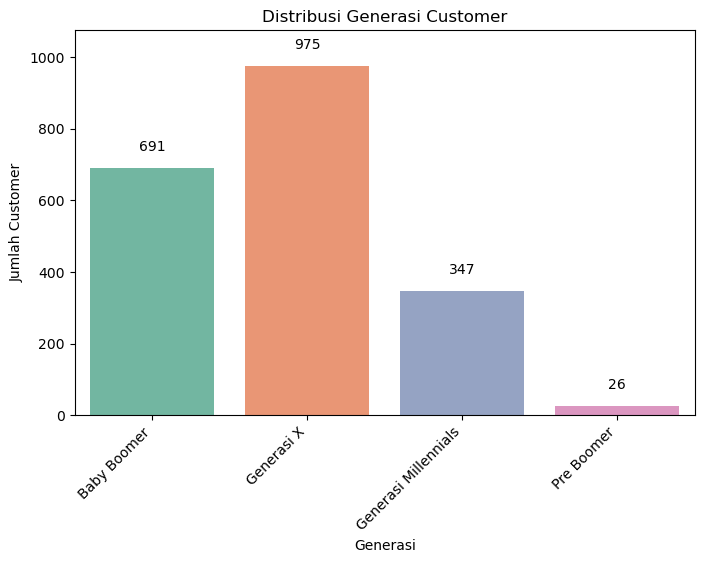

In [222]:
# Plot distribusi Cust_Generasi
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cust_generasi', palette='Set2')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom',
                       xytext=(0, 10), textcoords='offset points') 

plt.title('Distribusi Generasi Customer')
plt.xlabel('Generasi')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df['cust_generasi'].value_counts().max() + 100)
plt.show()


2. Plot Distribusi Kategori Pendapatan Customer

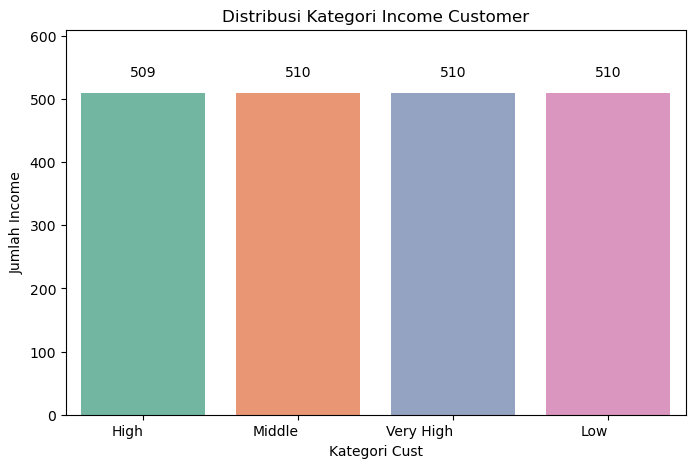

In [220]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Cat_Income', palette='Set2')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom',
                       xytext=(0, 10), textcoords='offset points') 

plt.title('Distribusi Kategori Income Customer')
plt.xlabel('Kategori Cust')
plt.ylabel('Jumlah Income')
plt.xticks(rotation=0, ha='right')
plt.ylim(0, df['Cat_Income'].value_counts().max() + 100)
plt.show()

3. Plot Distribusi Jenjang Pendidikan Customer

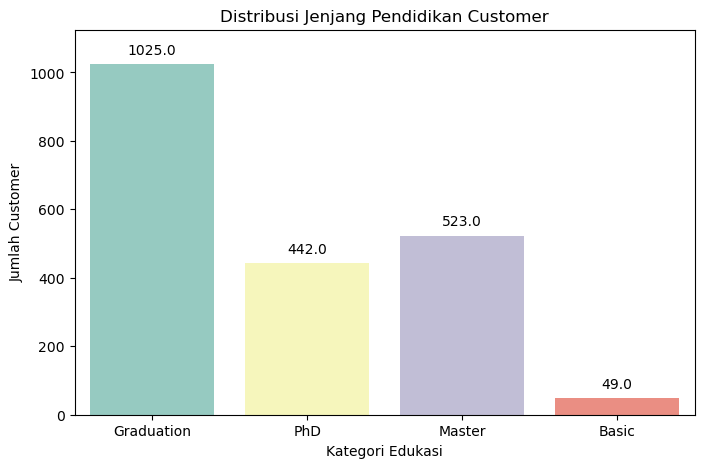

In [218]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Education', palette='Set3')

# Menambahkan label jumlah
for p in plt.gca().patches:
    plt.gca().annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribusi Jenjang Pendidikan Customer')
plt.xlabel('Kategori Edukasi')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=0)
plt.ylim(0, df['Education'].value_counts().max() + 100)
plt.show()

4. Plot Distribusi Status Menikah Customer

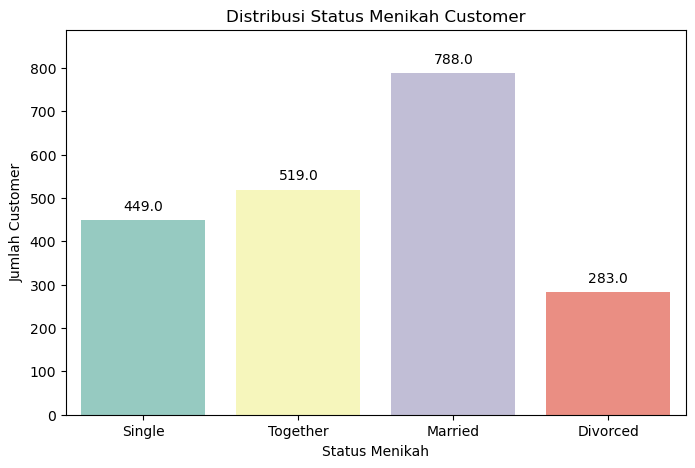

In [219]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set3')

# Menambahkan label jumlah
for p in plt.gca().patches:
    plt.gca().annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribusi Status Menikah Customer')
plt.xlabel('Status Menikah')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=0)
plt.ylim(0, df['Marital_Status'].value_counts().max() + 100)
plt.show()

## Menjawab Rumusan Masalah

**1. Dimanakah Customer lebih sering melakukan transaksi? (Store, Web, dan Catalogue)**


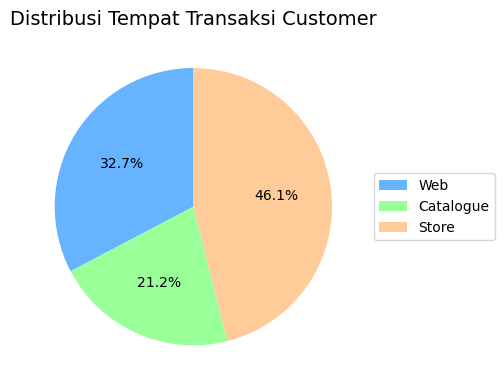

In [103]:
plt.figure(figsize=(6,4))
plt.pie(
    df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99']
)

plt.title('Distribusi Tempat Transaksi Customer', fontsize=14)
plt.legend(
    labels=['Web', 'Catalogue', 'Store'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

Berdasarkan distribusi di atas, **sebagian besar pelanggan lebih memilih berbelanja di store**. Berikut adalah beberapa rekomendasi:

1. **Optimalkan Pengalaman di Toko**: Karena banyak pelanggan yang lebih suka berbelanja langsung di toko, penting untuk memastikan bahwa pengalaman belanja di toko fisik menjadi lebih menarik dan nyaman.

2. **Perbaiki Pengalaman Belanja Online**: Dengan hampir sepertiga pembelian dilakukan secara online, meningkatkan kualitas pengalaman pengguna di situs web, baik dari segi desain maupun fungsionalitas, akan sangat menguntungkan.

3. **Personalisasi Katalog**: Untuk 21,2% pelanggan yang berbelanja melalui katalog, memberikan katalog yang lebih terpersonalisasi sesuai dengan preferensi individu mereka bisa menjadi langkah yang tepat.

**2. Kategori produk apa yang penjualannya paling tinggi?**

In [168]:
# Mengembalikan alias kolom ke nama aslinya
df = df.rename(columns={v: k for k, v in alias_columns.items()})
print(df.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Produk', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Freq_Place ', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Generation', 'cust_generasi', 'Freq_Place',
       'Total_Buy', 'Cat_Income'],
      dtype='object')


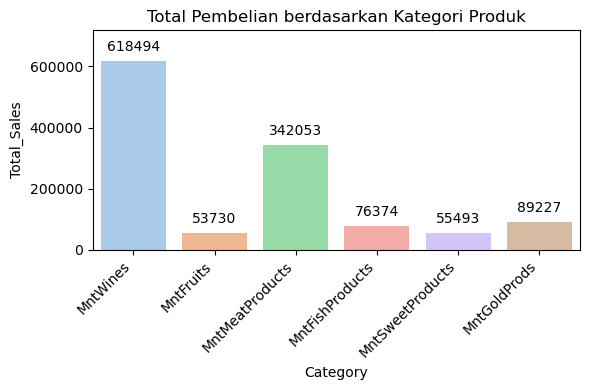

In [234]:
# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=df_sum, x='Category', y='Total_Sales', palette='pastel')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', 
                       xytext=(0, 5),  # Lebih dekat batang
                       textcoords='offset points') 

plt.title('Total Pembelian berdasarkan Kategori Produk')
plt.ylim(0, df_sum['Total_Sales'].max() + 100000)  # Tambah margin atas
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Berdasarkan Bar Chart diatas dapat disimpulkan bahwa:
1. Berdasarkan data, pengeluaran tertinggi oleh pelanggan terjadi di kategori produk Wine, dengan total penjualan yang mencapai $618,494
2. Kategori produk Meat menempati posisi kedua dengan total penjualan sebesar $342,053
3. Kategori Fish Product dan Gold Product memiliki total penjualan sebesar $76,374 dan $89,22 menunjukkan bahwa kategori ini memiliki daya tarik menengah di antara pelanggan.
4. Kategori produk dengan total penjualan terendah adalah Buah dan Sweet, menunjukkan bahwa kategori ini mungkin kurang menarik bagi pelanggan saat ini.

**3. Apakah tingkat complain tinggi?**

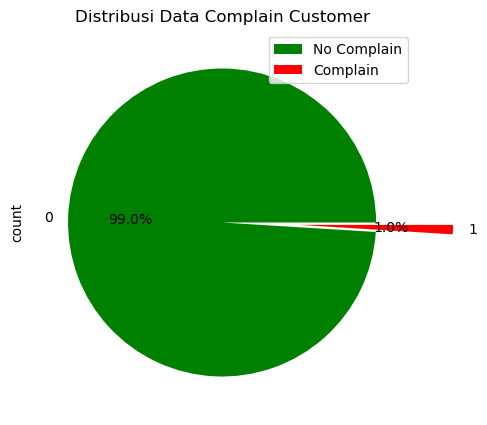

In [113]:
plt.figure(figsize=(5,5))
df['Complain'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0.00, 0.5), colors=['green', 'red'])
plt.title('Distribusi Data Complain Customer')
plt.legend(('No Complain', 'Complain'))
plt.show()


Berdasarkan Pie Chart di atas terlihat bahwa hasilnya adalah 1% yang pernah mengajukan complain. Hal ini dapat diartikan bahwa layanan yang telah dilakukan Supermarket sudah baik sehingga sangat sedikit pelanggan yang melakukan complain.

npte: dapat dilakukan analisis aspek mana yang mungkin perlu ditingkatkan.

**4. Apakah kampanye yang dilakukan diterima oleh pelanggan?**

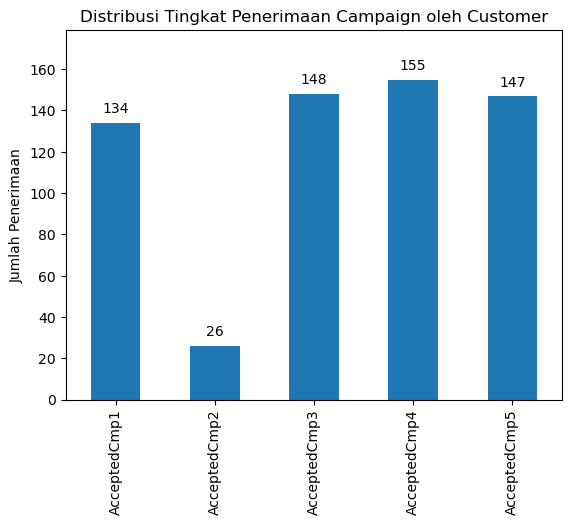

In [129]:
df_recoded = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].replace({1: 'Accepted', 0: 'Not Accepted'})

ax = df_recoded.apply(lambda x: (x == 'Accepted').sum()).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribusi Tingkat Penerimaan Campaign oleh Customer')
plt.ylabel('Jumlah Penerimaan')
plt.ylim(0, ax.get_ylim()[1] * 1.1)
plt.show()


Berdasarkan barchart di atas:
1. Kampanye paling efektif adalah Kampanye ke-4 (4th campaign)
2. Kampanye kurang efektif adalah Kampanye ke-2 (2nd campaign). Hal ini dapat menunjukkan bahwa kampanye ini kurang sesuai dengan minat pelanggan.

**5. Apakah diskon mempengaruhi banyaknya pembelian oleh pelanggan?**

**5.1 Hubungan Diskon dengan Total Pembelian**

In [130]:
# mengecek kolom diskon (Kolom NumDealsPurchases)
df['NumDealsPurchases'].describe()

count    2039.000000
mean        2.329083
std         1.934170
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

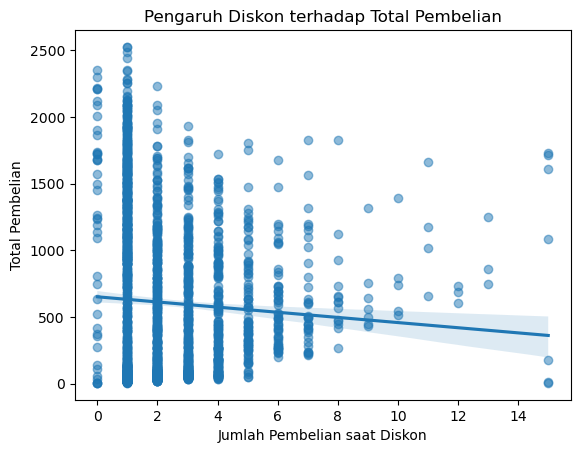

In [237]:
# Dengan garis regresi
sns.regplot(x='NumDealsPurchases', y='Total_Buy', data=df, scatter_kws={'alpha':0.5})
plt.title('Pengaruh Diskon terhadap Total Pembelian')
plt.xlabel('Jumlah Pembelian saat Diskon')
plt.ylabel('Total Pembelian')
plt.show()


In [132]:
# menentukan korelasi antara diskon dan total pembelian dengan Korelasi Pearson
correlation = df['NumDealsPurchases'].corr(df['Total_Buy'])
print(f'Nilai Korelasi: {correlation:.2f}')


Nilai Korelasi: -0.06


**Kesimpulan sementara:**
- Berdasarkan hasil perhitungan, nilai korelasi antara jumlah pembelian saat diskon dan total pembelian adalah -0.06. Nilai ini menunjukkan hubungan yang sangat lemah dan negatif. Maka, dapat disimpulkan bahwa diskon tidak secara signifikan mempengaruhi peningkatan jumlah pembelian oleh pelanggan.

**5.2 Hubungan Diskon dengan Frejuensi Pembelian**

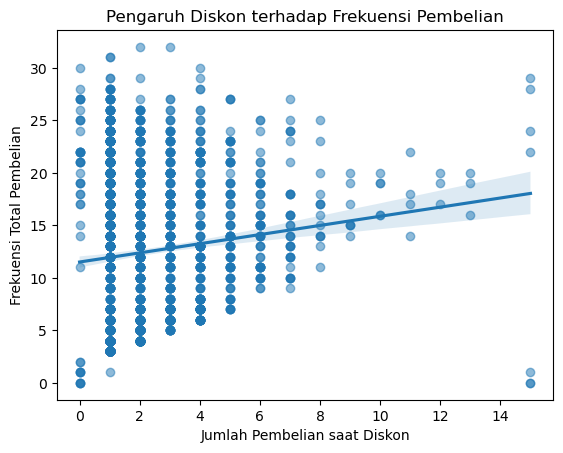

In [240]:
df['Total_Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# plot
sns.regplot(x='NumDealsPurchases', y='Total_Frequency', data=df, scatter_kws={'alpha':0.5})
plt.title('Pengaruh Diskon terhadap Frekuensi Pembelian')
plt.xlabel('Jumlah Pembelian saat Diskon')
plt.ylabel('Frekuensi Total Pembelian')
plt.show()


In [134]:
correlation = df['NumDealsPurchases'].corr(df['Freq_Place'])
print(f'Nilai Korelasi: {correlation:.2f}')

Nilai Korelasi: 0.12


**Kesimpulan sementara:**
- Berdasarkan hasil perhitungan, nilai korelasi antara jumlah pembelian saat diskon dan Frekuensi Pembelian adalah 0.12. Nilai ini menunjukkan hubungan yang sangat lemah, artinya Diskon tidak terlalu mempengaruhi Frekuensi Pembelian karena nilai korelasi nya sangat kecil dan dekat dengan 0

**6. Apakah tahun lahir, status, pendidikan, dan pendapatan customer mempengaruhi banyaknya produk yang dibeli?**
- Untuk menjawab rumusan masalah di atas, analisis akan dibagi berdasarkan tiap variabel

## Analisis berdasarkan Generasi (tahun lahir)

In [172]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Produk', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Freq_Place ', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Generation', 'cust_generasi', 'Freq_Place',
       'Total_Buy', 'Cat_Income'],
      dtype='object')


In [ ]:
# distribusi income per generasi
df[['cust_generasi','Cat_Income']].groupby('cust_generasi').value_counts()

cust_generasi         Cat_Income
Baby Boomer           High          224
                      Very High     196
                      Middle        176
                      Low            95
Generasi Millennials  Low           150
                      Very High      89
                      Middle         70
                      High           38
Generasi X            Low           265
                      Middle        258
                      High          238
                      Very High     214
Pre Boomer            Very High      11
                      High            9
                      Middle          6
Name: count, dtype: int64

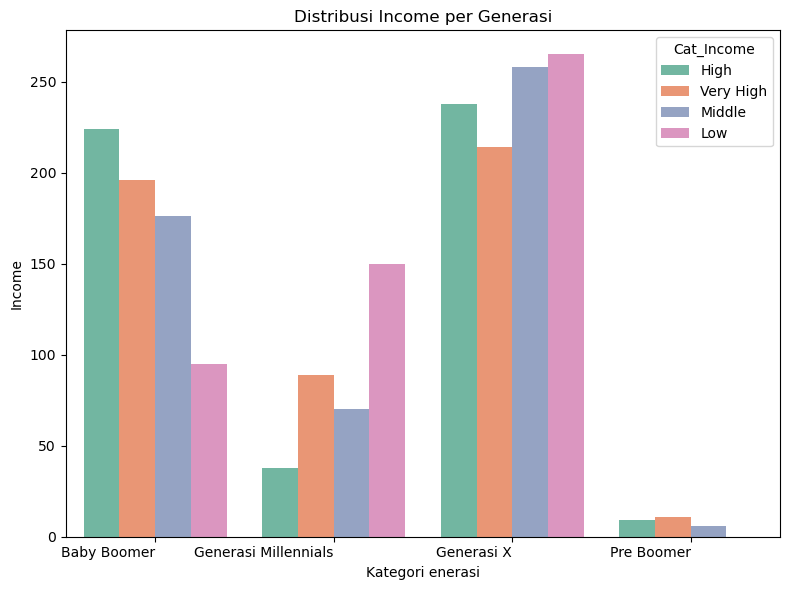

In [208]:
grouped = df[['cust_generasi', 'Cat_Income']].groupby('cust_generasi')['Cat_Income'].value_counts().reset_index(name='count')

# plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='cust_generasi', y='count', hue='Cat_Income', palette='Set2')

plt.title('Distribusi Income per Generasi')
plt.xlabel('Kategori enerasi')
plt.ylabel('Income')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [180]:
# Membuat Agregasi Median setiap pengeluaran pada kategori produk berdasarkan Education
df[['cust_generasi','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Buy']].groupby('cust_generasi').median().reset_index().sort_values(by='Total_Buy',ascending=False)

,cust_generasi,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Buy
3,Pre Boomer,507.5,35.5,238.5,53.5,21.5,26.0,1081.5
0,Baby Boomer,288.0,11.0,97.0,15.0,11.0,30.0,594.0
2,Generasi X,141.0,6.0,53.0,10.0,7.0,21.0,296.0
1,Generasi Millennials,46.0,8.0,46.0,12.0,9.0,22.0,160.0


**Kesimpulan:**
1. Pre Boomer memiliki pengeluaran rata-rata tertinggi di hampir semua kategori produk, dengan total pengeluaran rata-rata sebesar 1081,5. Kategori produk yang paling banyak dibeli adalah Wine, dengan rata-rata pengeluaran mencapai 507,5.
2. Baby Boomer mencatatkan rata-rata pengeluaran sebesar 594,0. Meskipun lebih rendah dibandingkan dengan Pre Boomer, Baby Boomer memiliki pengeluaran yang cukup signifikan untuk kategori Wine, dengan rata-rata 288,0.
3. Generasi X memiliki rata-rata pengeluaran total sebesar 296,0. Untuk kategori produk, pengeluaran tertinggi mereka adalah pada Wine (141,0) dan Meat (53,0).
4. Millennials menunjukkan pengeluaran rata-rata total terendah, yaitu 160,0.

**Rekomendasi:**
1. **Tingkatkan Penawaran Wine untuk Pre Boomer dan Baby Boomer**:  
   Pre Boomer dan Baby Boomer menunjukkan pengeluaran besar di kategori **Wine**. Oleh karena itu, menambah variasi produk wine premium atau eksklusif bisa menjadi strategi yang efektif untuk menarik perhatian segmen ini.

2. **Berikan Penawaran Khusus untuk Generasi X**:  
   Generasi X memiliki pengeluaran tinggi pada produk **Wine** dan **Meat**. Memberikan diskon atau paket bundling untuk kedua kategori produk ini dapat mendorong mereka untuk melakukan pembelian lebih banyak.

3. **Strategi Promosi yang Lebih Terjangkau untuk Millennials**:  
   Dengan pengeluaran rata-rata yang lebih rendah, memberikan penawaran harga yang lebih terjangkau atau diskon khusus bisa menarik minat **Millennials** dan mendorong mereka untuk meningkatkan frekuensi pembelian.

4. **Personalisasi Strategi Pemasaran Berdasarkan Generasi**:  
   Menyesuaikan strategi pemasaran dengan preferensi masing-masing generasi akan lebih efektif. Gunakan pendekatan yang lebih eksklusif dan premium untuk Pre Boomer dan Baby Boomer, sementara menawarkan nilai lebih dan fleksibilitas untuk Millennials dan Generasi X.

## Analisis berdasarkan Status Customer

In [181]:
# distribusi Income berdasarkan Marital Status
df[['Marital_Status','Cat_Income']].groupby('Marital_Status').value_counts()

Marital_Status  Cat_Income
Divorced        High           79
                Middle         74
                Very High      73
                Low            57
Married         High          203
                Low           198
                Very High     196
                Middle        191
Single          Low           124
                Middle        117
                Very High     111
                High           97
Together        Low           131
                High          130
                Very High     130
                Middle        128
Name: count, dtype: int64

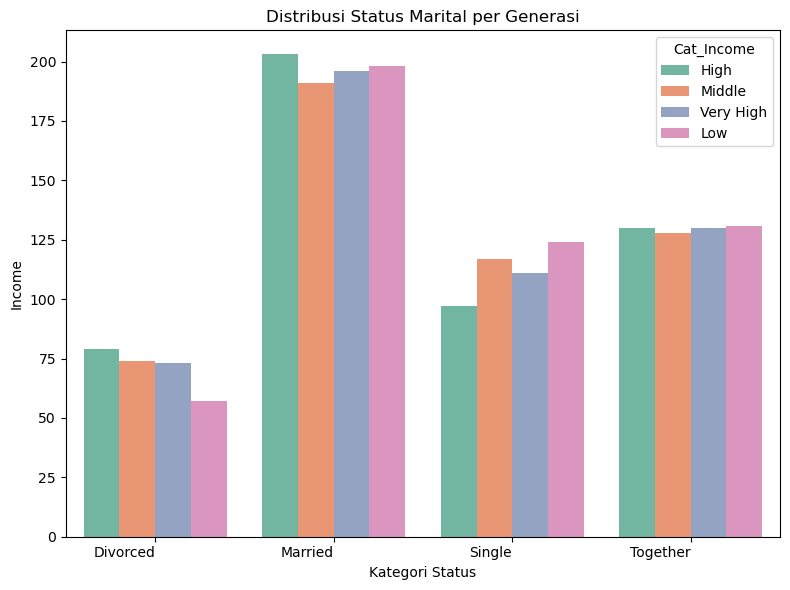

In [216]:
grouped = df[['Marital_Status', 'Cat_Income']].groupby('Marital_Status')['Cat_Income'].value_counts().reset_index(name='count')

# plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='Marital_Status', y='count', hue='Cat_Income', palette='Set2')

plt.title('Distribusi Status Marital per Generasi')
plt.xlabel('Kategori Status')
plt.ylabel('Income')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [182]:
# Melakukan agregating median dari total pengeluaran disetiap kategori produk berdasarkan Marital Status
df[['Marital_Status','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Buy']].groupby('Marital_Status').median().reset_index().sort_values(by='Total_Buy',ascending=False)

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Buy
0,Divorced,205.0,10.0,75.0,12.0,8.0,27.0,497.0
1,Married,179.0,7.0,65.5,12.0,8.0,22.0,404.0
3,Together,174.0,8.0,67.0,12.0,8.0,22.0,380.0
2,Single,154.0,8.0,60.0,12.0,9.0,26.0,354.0


Berdasarkan Tabel di atas, tampak bahwa tiap kategori status customer banyak menghabiskan/membeli produk wine

## Analisis berdasarkan Jenjang Pendidikan Customer

In [183]:
# distribusi Income berdasarkan Education
df[['Education','Cat_Income']].groupby('Education').value_counts()

Education   Cat_Income
Basic       Low            49
Graduation  Very High     277
            Low           258
            High          249
            Middle        241
Master      Middle        150
            Low           135
            High          123
            Very High     115
PhD         High          137
            Middle        119
            Very High     118
            Low            68
Name: count, dtype: int64

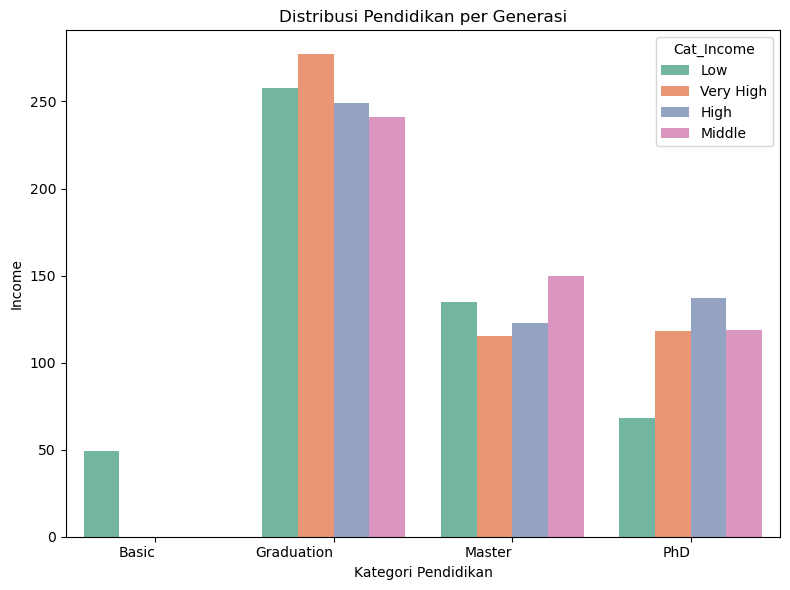

In [217]:
grouped = df[['Education', 'Cat_Income']].groupby('Education')['Cat_Income'].value_counts().reset_index(name='count')

# plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='Education', y='count', hue='Cat_Income', palette='Set2')

plt.title('Distribusi Pendidikan per Generasi')
plt.xlabel('Kategori Pendidikan')
plt.ylabel('Income')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [185]:
# Melakukan agregating median dari total pengeluaran disetiap kategori produk berdasarkan Education
df[['Education','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Buy']].groupby('Education').median().reset_index().sort_values(by='Total_Buy',ascending=False)

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Buy
3,PhD,267.0,4.0,69.5,6.0,3.0,16.0,485.0
1,Graduation,184.0,10.0,81.0,15.0,12.0,29.0,415.0
2,Master,145.0,8.0,59.0,12.0,8.0,23.0,326.0
0,Basic,2.0,7.0,7.0,10.0,7.0,15.0,57.0


## Analisis berdasarkan Pendapatan/Income Customer

In [139]:
correlation = df[['Income', 'Total_Buy']].corr()
print(correlation)


             Income  Total_Buy
Income     1.000000   0.649295
Total_Buy  0.649295   1.000000


In [227]:
df[['Cat_Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Buy']].groupby('Cat_Income').median().reset_index().sort_values(by='Total_Buy',ascending=False)

,Cat_Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Buy
3,Very High,587.0,44.0,410.5,72.0,46.5,50.0,1366.5
0,High,376.0,14.0,115.0,17.0,13.0,40.0,728.0
2,Middle,76.0,3.0,30.5,4.0,3.0,16.0,162.0
1,Low,10.0,3.0,12.0,4.0,3.0,9.5,53.0


**7. Apakah tahun lahir, status, pendidikan, dan pendapatan customer mempengaruhi kategori produk yang dibeli?**

In [224]:
# Membuat Statistik Deskriptif seluruh kategori produk dan Total Pembelian (kolom Total_Buy)
df_summary = df[['MntWines', 'MntFruits',
                 'MntMeatProducts', 'MntFishProducts', 
                 'MntSweetProducts', 'MntGoldProds', 
                 'Total_Buy']].describe().round(2).transpose().sort_values(by='50%', ascending=False)
df_summary


,count,mean,std,min,25%,50%,75%,max
Total_Buy,2039.0,605.87,602.09,5.0,68.5,396.0,1044.5,2525.0
MntWines,2039.0,303.33,335.82,0.0,23.0,174.0,503.5,1493.0
MntMeatProducts,2039.0,167.76,227.93,0.0,16.0,67.0,230.0,1725.0
MntGoldProds,2039.0,43.76,52.02,0.0,9.0,24.0,56.0,362.0
MntFishProducts,2039.0,37.46,54.70,0.0,3.0,12.0,50.0,259.0
MntFruits,2039.0,26.35,39.82,0.0,2.0,8.0,33.0,199.0
MntSweetProducts,2039.0,27.22,41.70,0.0,1.0,8.0,34.0,263.0


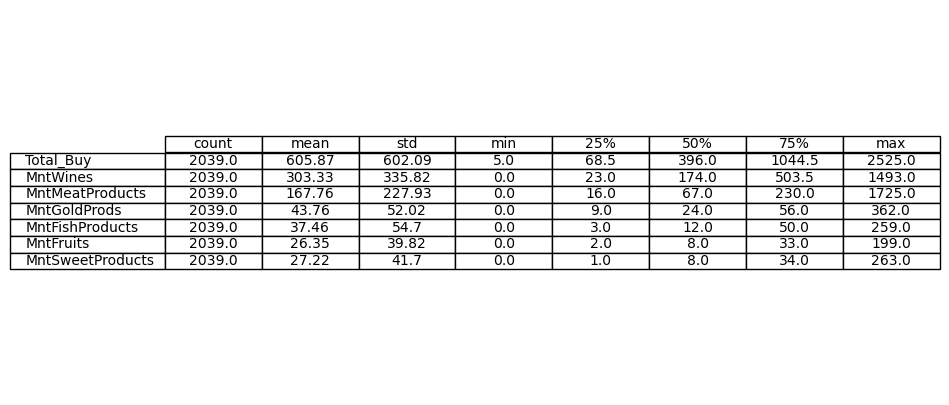

In [226]:
# Buat plot tabel
fig, ax = plt.subplots(figsize=(10,5)) 
ax.axis('off') 
tbl = pd.plotting.table(ax, df_summary, loc='center', cellLoc='center')

# Simpan gambar
plt.savefig('tabel_statistik_produk.png', bbox_inches='tight', dpi=480)
plt.show()

In [143]:
# Membuat Uji Korelasi Spearman dari seluruh avg Amount of Product Category dan Total Pembelian (kolom Total_Buy)
df_corr = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Buy']].corr('spearman').transpose()
df_corr

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Buy
MntWines,1.000000,0.517327,0.821558,0.524141,0.502645,0.575181,0.925398
MntFruits,0.517327,1.000000,0.713557,0.706632,0.688523,0.570432,0.682483
MntMeatProducts,0.821558,0.713557,1.000000,0.725988,0.695395,0.636182,0.939364
MntFishProducts,0.524141,0.706632,0.725988,1.000000,0.702312,0.562356,0.695370
MntSweetProducts,0.502645,0.688523,0.695395,0.702312,1.000000,0.543842,0.670405
MntGoldProds,0.575181,0.570432,0.636182,0.562356,0.543842,1.000000,0.692567
Total_Buy,0.925398,0.682483,0.939364,0.695370,0.670405,0.692567,1.000000


<Axes: >

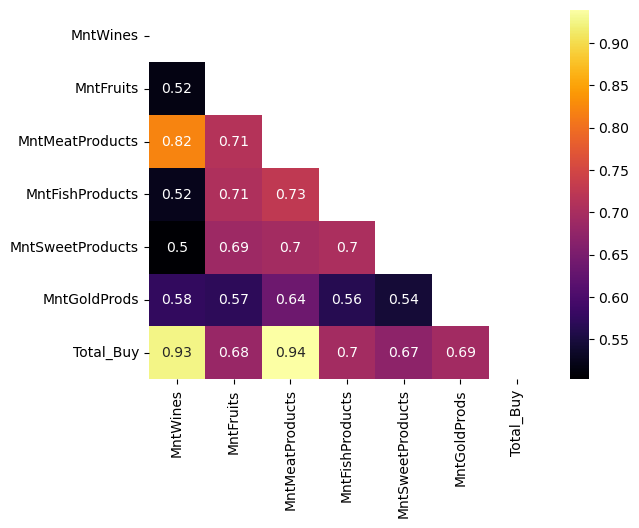

In [147]:
# Membuat Heatmap
matrix = np.triu(df_corr)
sns.heatmap(
    data = df_corr,
    annot=True ,
    mask = matrix,
    cmap='inferno'
)

**Kesimpulan dari Uji Korelasi antara seluruh Kategori Produk dengan Total Buy**
1. Wine dan Total Pengeluaran: Ada korelasi yang sangat kuat antara pembelian Wine (MntWines) dan total pengeluaran (Total_Buy) dengan nilai korelasi 0.925. Ini menunjukkan bahwa pelanggan yang membeli Wine cenderung juga membeli produk lain dan menghabiskan lebih banyak uang secara keseluruhan.

2. Meat Products dan Total Pengeluaran: Ada korelasi yang sangat kuat antara Meat Products (MntMeatProducts) dan total pengeluaran dengan nilai korelasi 0.939, yang hampir mendekati 1. Ini menunjukkan bahwa produk daging juga sangat penting dalam menentukan total pengeluaran pelanggan.

3. Korelasi Antar Kategori Produk: Ada korelasi positif antara hampir semua kategori produk, menunjukkan bahwa pelanggan yang membeli satu jenis produk cenderung juga membeli jenis produk lain. Misalnya, Wine dan Meat Products memiliki korelasi sebesar 0.821.

## **KESIMPULAN**

**1. General:**
- Secara keseluruhan, jumlah pelanggan baru per bulan relatif stabil antara tahun 2012 hingga 2014, dengan angka berkisar antara 75 hingga 100 pelanggan.
- Pengeluaran pelanggan terbesar dialokasikan pada produk Wine dan Meat.
- Pengeluaran pelanggan untuk produk Sweet dan Fruit cenderung lebih rendah.
- Diskon tidak berpengaruh signifikan terhadap frekuensi pembelian dan total pengeluaran pelanggan.
- Kampanye 2 kurang diminati oleh pelanggan.

**2. Demografi:**
- Berdasarkan tingkat pendidikan, segmen pelanggan terbesar di supermarket adalah mereka yang masuk kategori Graduation.
- Berdasarkan status pernikahan, pelanggan yang sudah menikah merupakan segmen terbesar.
- Berdasarkan tahun kelahiran, Generasi X mendominasi segmen pelanggan di supermarket.

**3. Pola Belanja:**
- Saluran Pembelian: Mayoritas pelanggan lebih memilih berbelanja langsung di toko fisik dibandingkan dengan berbelanja online atau melalui katalog.
- Kategori Produk: Wine dan Meat adalah kategori produk yang paling banyak dibeli dan memiliki pengeluaran tertinggi, sementara Fruits dan Sweets memiliki pengeluaran yang lebih rendah.

**4. Berdasarkan Demografi:** (menjawab rumusan)
- Pelanggan dengan status perceraian (Divorced) cenderung menghabiskan lebih banyak uang, terutama pada produk Wine.
- Pelanggan yang memiliki gelar "PhD" cenderung menghabiskan lebih banyak uang, terutama untuk produk wine dan meat.
- Pelanggan dari generasi Pre Boomer lebih banyak menghabiskan uang dibandingkan dengan Baby Boomers, Generasi X, dan Millennials.
- Pelanggan dengan pendapatan "Very High" memiliki pengeluaran tertinggi di seluruh kategori produk, dengan Wine menjadi produk yang paling banyak dibeli.
- Distribusi kategori pendapatan terlihat merata di semua level, yang menunjukkan bahwa supermarket melayani pelanggan dari berbagai rentang pendapatan.

## **REKOMENDASI**

### **1. Strategi Produk dan Penjualan**  
- **Fokus pada Produk Wine dan Meat**:  
  - Tingkatkan stok dan variasi produk Wine dan Meat, karena ini adalah kategori dengan pengeluaran tertinggi.  
  - Tawarkan paket bundling (contoh: Wine + Meat dengan diskon kecil) untuk mendorong pembelian lebih besar.  
  - Lakukan promosi khusus untuk produk premium di kategori ini, terutama untuk pelanggan dengan pendapatan tinggi.  

- **Optimalkan Penjualan Produk Fruits dan Sweets**:  
  - Buat strategi cross-selling (misalnya: "Beli Wine, dapatkan diskon buah") untuk meningkatkan penjualan kategori yang kurang diminati.  
  - Sediakan display menarik di dekat kasir atau area strategis untuk meningkatkan impulsif pembelian.  

- **Evaluasi Program Diskon**:  
  - Karena diskon tidak signifikan memengaruhi pembelian, pertimbangkan untuk mengalihkan anggaran diskon ke program loyalitas atau bundling produk.  

### **2. Strategi Pemasaran & Kampanye**  
- **Tingkatkan Kampanye yang Efektif**:  
  - Kampanye 2 kurang diminati, lakukan analisis lebih dalam untuk memahami penyebabnya (misal: konten, waktu, atau target audiens).  
  - Fokus pada kampanye yang lebih personal, terutama untuk segmen pelanggan dengan pengeluaran tinggi (PhD, Very High Income, dan Pre Boomer).  

- **Personalized Marketing**:  
  - Targetkan promosi Wine untuk pelanggan bercerai (Divorced) dan berpendidikan tinggi (PhD), karena mereka cenderung lebih banyak membeli produk ini.  
  - Buat segmentasi pemasaran berdasarkan generasi:  
    - Generasi X (dominan) → Tawarkan promo keluarga atau produk sehari-hari.  
    - Pre Boomer (high spending) → Tawarkan produk premium dan layanan eksklusif.  

### **3. Pengembangan Saluran Pembelian**  
- **Tingkatkan Pengalaman Belanja Offline:**
    - Karena mayoritas pelanggan lebih suka belanja langsung di toko, optimalkan tata letak toko dengan penempatan strategis produk Wine dan Meat.
    - Sediakan sampling atau demo produk untuk meningkatkan minat beli.
    - Eksplorasi Potensi Online:
    - Meskipun belanja online masih rendah, bisa dikembangkan dengan promo khusus (contoh: gratis ongkir untuk pembelian Wine di atas nominal tertentu).

- **Eksplorasi Potensi Online**:  
  - Meskipun belanja online masih rendah, bisa dikembangkan dengan promo khusus (contoh: gratis ongkir untuk pembelian Wine di atas nominal tertentu).   

Dengan menerapkan rekomendasi ini, supermarket dapat meningkatkan penjualan, loyalitas pelanggan, dan efektivitas kampanye pemasaran.